In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import tensorflow as tf
from tensorflow import keras

# Load the Trained SUMO2/3 Model on Hendriks et al. SUMO2/3 Dataset

In [2]:
model_load = keras.models.load_model("SUMO2_330482327.h5")

# Load the Independent Hendriks et al. SUMO2/3 Dataset

In [3]:
df_test_SUMO_2_3 = pd.read_csv("Independent_Test_Set_of_Hendriks_et_al_SUMO_2_3.csv")
df_test_SUMO_2_3 = df_test_SUMO_2_3.drop(['Unnamed: 0'], axis=1)

df_test_SUMO_2_3_feature = df_test_SUMO_2_3.iloc[:,4:]
test_SUMO_2_3 = np.array(df_test_SUMO_2_3_feature)

y_independent = np.array(df_test_SUMO_2_3["Label"])

X_independent = test_SUMO_2_3

print(X_independent.shape,y_independent.shape)

(2538, 1024) (2538,)


In [4]:
print(df_test_SUMO_2_3["Label"].value_counts())

1    1269
0    1269
Name: Label, dtype: int64


In [10]:
Y_pred = model_load.predict(X_independent)
Y_pred = (Y_pred > 0.5)
y_pred = [np.argmax(y, axis=None, out=None) for y in Y_pred]
y_pred = np.array(y_pred)
Accuracy = accuracy_score(y_independent,y_pred)
print()
print('Accuracy on test set:   ', Accuracy)
confusion = confusion_matrix(y_independent,y_pred)

TP = confusion[1][1]
FP = confusion[0][1]
TN = confusion[0][0]
FN = confusion[1][0]
print()
print("Confusion Matrix:")
print()
print(confusion)
print()
mcc = matthews_corrcoef(y_independent,y_pred)
print("MCC : ", mcc)
print()
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
precision = TP/(TP+FP)
print('Sensitivity : ', sensitivity)
print()
print('Specificity : ', specificity)
print()
print("Precision Score: ",precision)
print()


Accuracy on test set:    0.7486209613869188

Confusion Matrix:

[[937 332]
 [306 963]]

MCC :  0.49734632216145264

Sensitivity :  0.7588652482269503

Specificity :  0.7383766745468873

Precision Score:  0.7436293436293436



In [6]:
model_load.summary()

Model: "sequential_327"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_654 (Dense)            (None, 64)                65600     
_________________________________________________________________
dropout_327 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_655 (Dense)            (None, 2)                 130       
Total params: 65,730
Trainable params: 65,730
Non-trainable params: 0
_________________________________________________________________


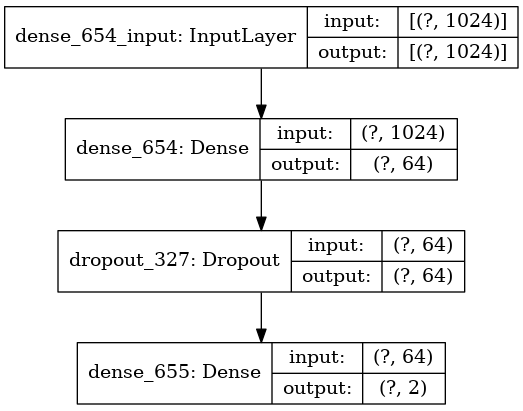

In [11]:
tf.keras.utils.plot_model(model_load, to_file="SUMO_2_3.png", show_shapes=True)

# Thank You.